In [1]:
# -*- coding: utf-8 -*-
"""
play around
"""
import getpass
import os
import pickle as cp
import sys
import time
import itertools as it
import matplotlib.pyplot as plt
from matplotlib import colors

%matplotlib inline
import networkx as nx
import numpy as np
import pandas as pd
from random import uniform
from matplotlib import rcParams 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print "done"

done


(200, 200)

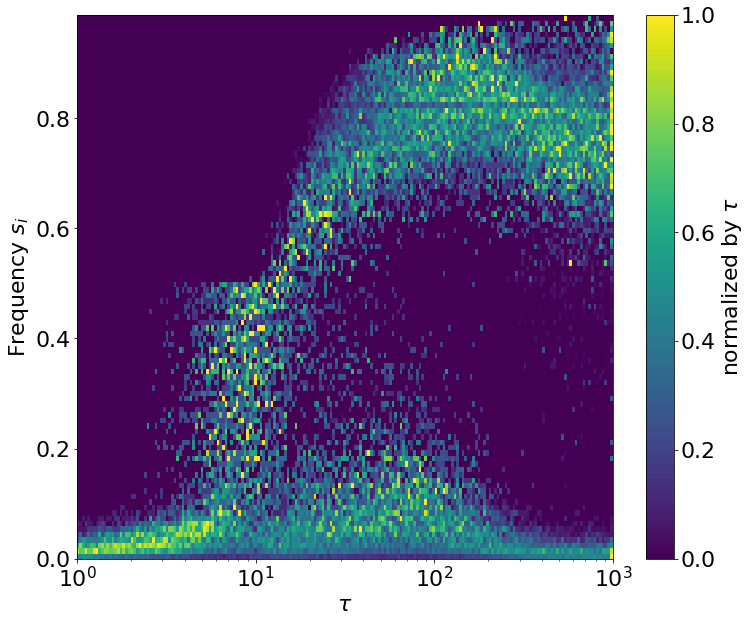

In [55]:
## X2 log 
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X2log/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(200)]) for j in range(200)], 
               axis= 1, keys = np.logspace(0,3,200))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,200),200*100), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,200),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data - 0) / np.max(data, axis=1)[:, np.newaxis]
im2 = ax.pcolormesh(xedges,yedges , (norm_data),  cmap='viridis')
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')
#fig.savefig('ttb_bara100_3_log03_200_s200.pdf')
#print norm_data[0,:]

(100, 200)

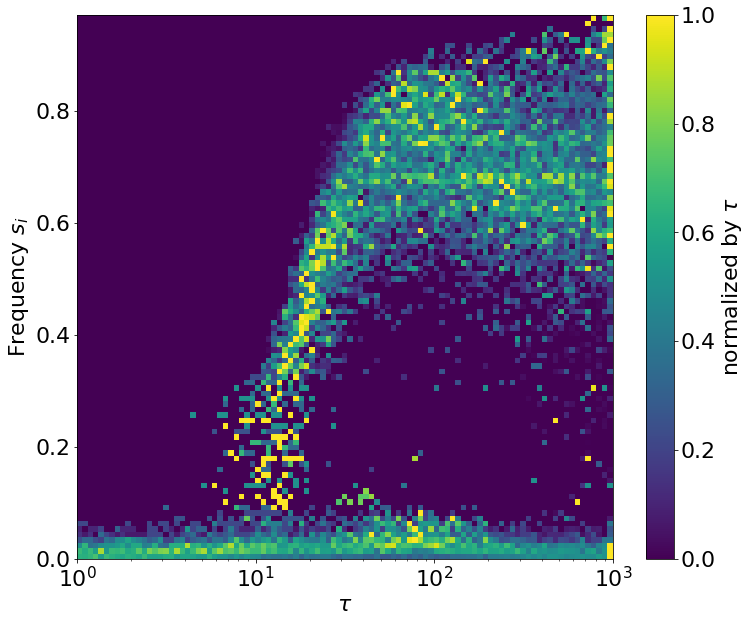

In [4]:
#X2 log alpha03
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X2log_alpha03/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(200)]) for j in range(100)], 
               axis= 1, keys = np.logspace(0,3,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,100),200*100), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data - 0) / np.max(data, axis=1)[:, np.newaxis]
im2 = ax.pcolormesh(xedges,yedges , (norm_data),  cmap='viridis')
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')
fig.savefig('ttb_bara100_3_log03_100_s200_alpha03.pdf')
#print norm_data[0,:]

(100, 200)

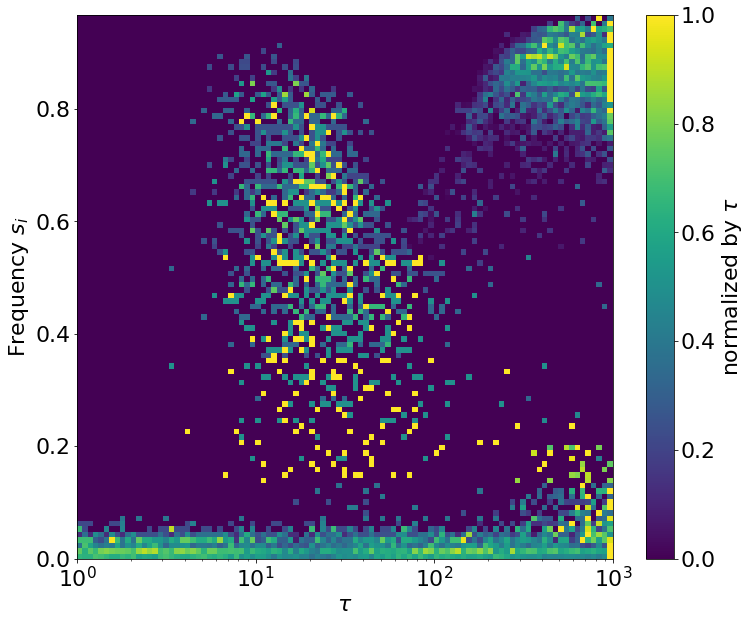

In [28]:
## X5_Ldistphi01_fully_q
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X5_Ldistphi01_fully_q/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(200)]) for j in range(100)], 
               axis= 1, keys = np.logspace(0,3,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,100),200*100), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data - 0) / np.max(data, axis=1)[:, np.newaxis]
from matplotlib import colors
im2 = ax.pcolormesh(xedges,yedges , norm_data,  cmap='viridis')
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')
fig.savefig('X5_Ldistphi01_fully_q.pdf')
#print norm_data[0,:]

(100, 200)

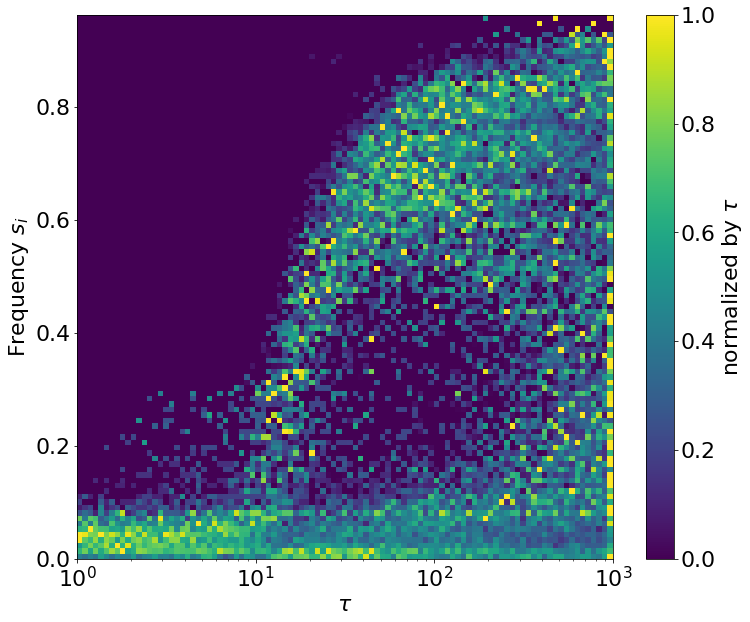

In [6]:
## X6_Ldistphi05_bara_alpha03_q
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X6_Ldistphi05_bara_alpha03_q/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(200)]) for j in range(100)], 
               axis= 1, keys = np.logspace(0,3,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,100),200*100), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data - 0) / np.max(data, axis=1)[:, np.newaxis]
im2 = ax.pcolormesh(xedges,yedges , (norm_data),  cmap='viridis')
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')
#fig.savefig('X6_Ldistphi05_bara_q0.pdf')
#print norm_data[0,:]

(100, 200)

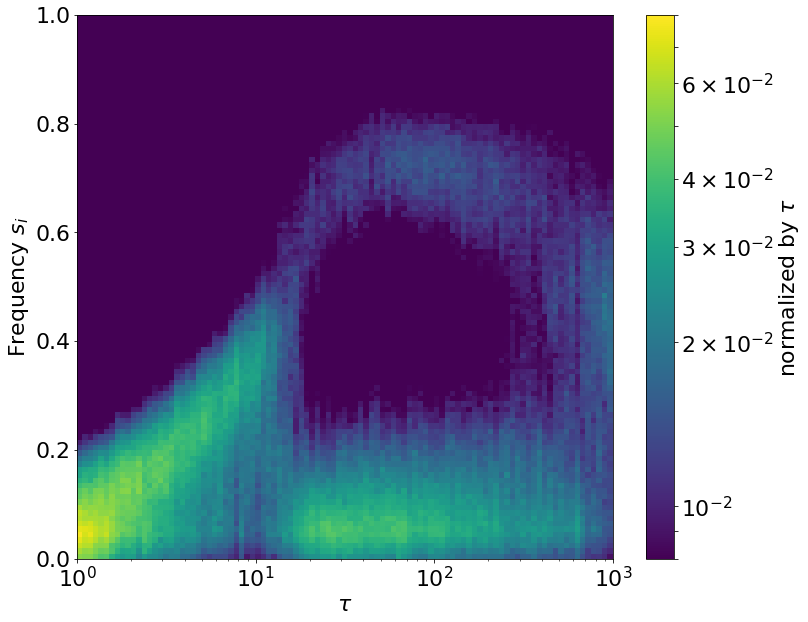

In [26]:
## X4_Ldistphi05_bara_eps05_q
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X4_Ldistphi05_bara_eps05_q/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(200)]) for j in range(100)], 
               axis= 1, keys = np.logspace(0,3,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,100),200*100), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data - 0) / np.sum(data, axis=0)[np.newaxis,:]
#im2 = ax.pcolormesh(xedges,yedges , (norm_data),  cmap='viridis')
im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis',norm=colors.LogNorm(vmin=.8/100,
                                                                                    vmax=0.08))
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')
fig.savefig('X4_Ldistphi05_bara_eps05_q.pdf')
#print norm_data[0,:]

(100, 200)

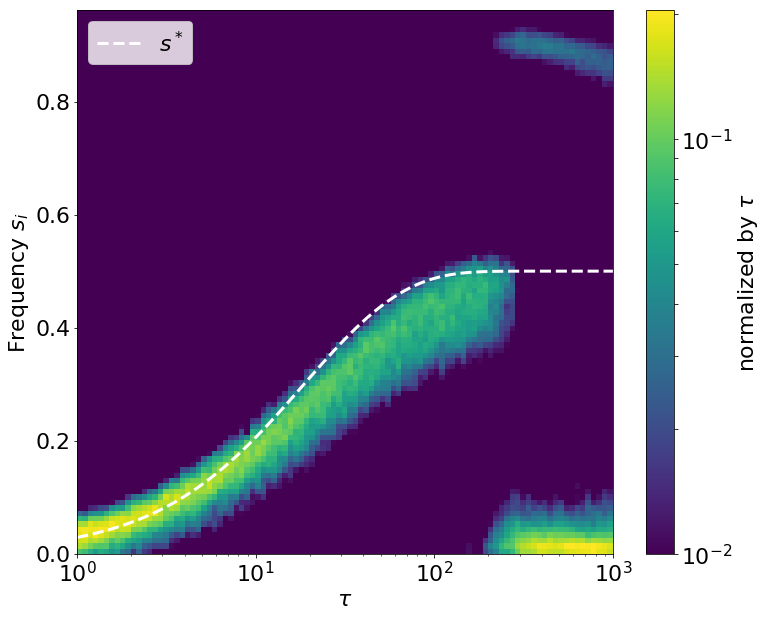

In [16]:
## X3_Ldistphi01_fully_eps01_q X3_Ldistphi01_fully_eps01_q_longer
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X3_Ldistphi01_fully_eps01_q/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(200)]) for j in range(100)], 
               axis= 1, keys = np.logspace(0,3,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,100),200*100), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data -0) / np.sum(data, axis=0)[ np.newaxis,:]
im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis',norm=colors.LogNorm(vmin=1./100,
                                                                                    vmax=norm_data.max()))
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')

taus = np.logspace(0,3,100)
#s = 0.5 - np.sqrt(taus*1)*0.03/(np.exp(taus*0.03) - 1.
a = np.exp(-taus*delta/2)
# ax.semilogx(taus, sss[0]
#             ,'w--',label=r'$s^*$with $L_\mathrm{low}$'); #
# ax.semilogx(taus, sss[2]
#             ,'w--',label=r'$s^*$with $L_\mathrm{high}$'); #
ax.semilogx(taus, (a-1)/(a-2)
            ,'w--',lw=3, label=r'$s^*$'); #
ax.legend(loc='upper left');
#ax.set_title(r'$K_0=0$')
fig.savefig('X3_Ldistphi01_fully_eps01_q_fit.pdf')

#fig.savefig('X3_Ldistphi01_fully_eps01_q.pdf')
#print norm_data[0,:]

(100, 200)

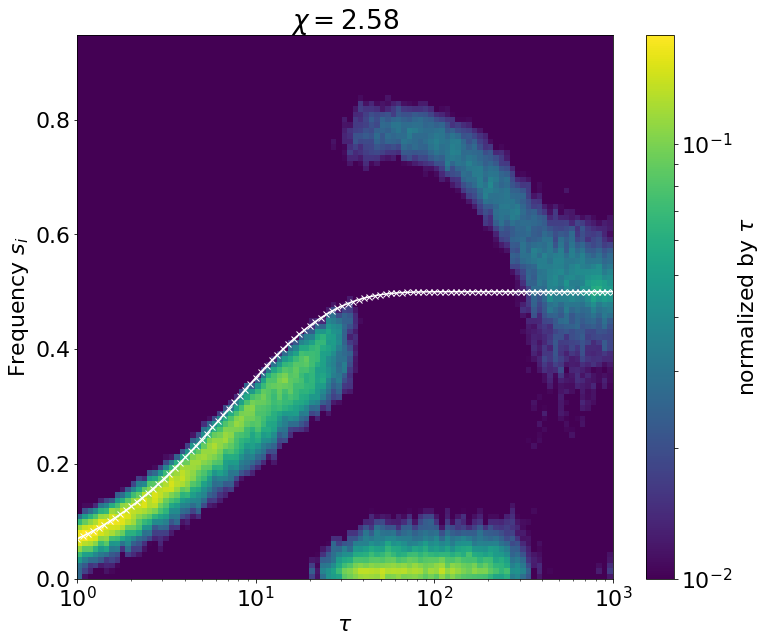

In [13]:
## X3_Ldistphi01_fully_eps01_q
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X4_Ldistphi01_bara_eps01_q/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(200)]) for j in range(100)], 
               axis= 1, keys = np.logspace(0,3,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,100),200*100), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})


fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data -0) / np.sum(data, axis=0)[ np.newaxis,:]
im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis',norm=colors.LogNorm(vmin=1./100,
                                                                                    vmax=norm_data.max()))
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

taus = np.logspace(0,3,100)
delta =0.06
#s = 0.5 - np.sqrt(taus*1)*0.03/(np.exp(taus*0.03) - 1.
a = np.exp(-taus*(2.58)*delta/2)
ax.semilogx(taus, (a-1)/(a-2)
            ,'wx-',label=r'$s^*$'); 

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')
ax.set_title(r'$\chi=2.58$')
fig.savefig('bara_100_3_fit.pdf')

(100, 200)

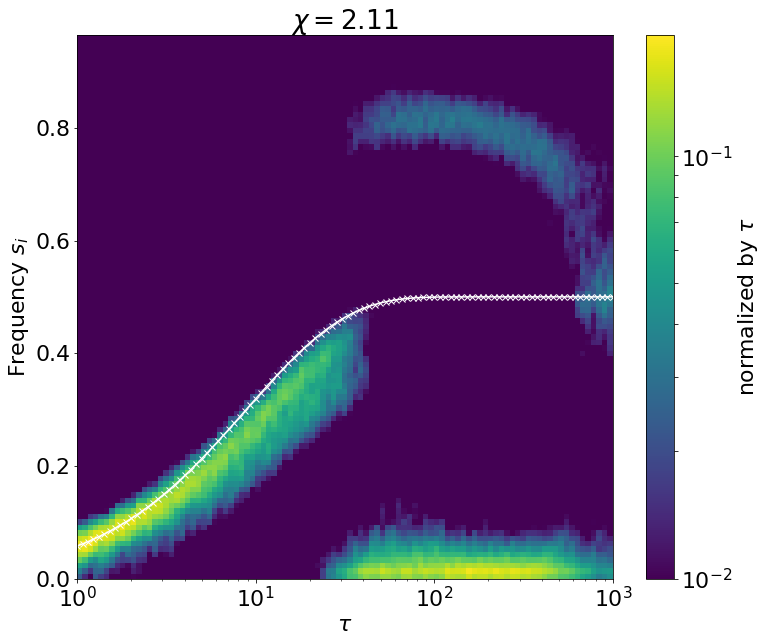

In [7]:
## X4_Ldistphi01_bara6_eps01_q_longer
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X4_Ldistphi01_bara6_eps01_q_longer/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(200)]) for j in range(100)], 
               axis= 1, keys = np.logspace(0,3,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,100),200*100), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})


fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data -0) / np.sum(data, axis=0)[ np.newaxis,:]
im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis',norm=colors.LogNorm(vmin=1./100,
                                                                                    vmax=norm_data.max()))
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

taus = np.logspace(0,3,100)
delta =0.06
#s = 0.5 - np.sqrt(taus*1)*0.03/(np.exp(taus*0.03) - 1.
a = np.exp(-taus*(2.11)*delta/2)
ax.semilogx(taus, (a-1)/(a-2)
            ,'wx-',label=r'$s^*$'); 

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')
ax.set_title(r'$\chi=2.11$')
fig.savefig('bara_100_6_fit.pdf')

(100, 50)

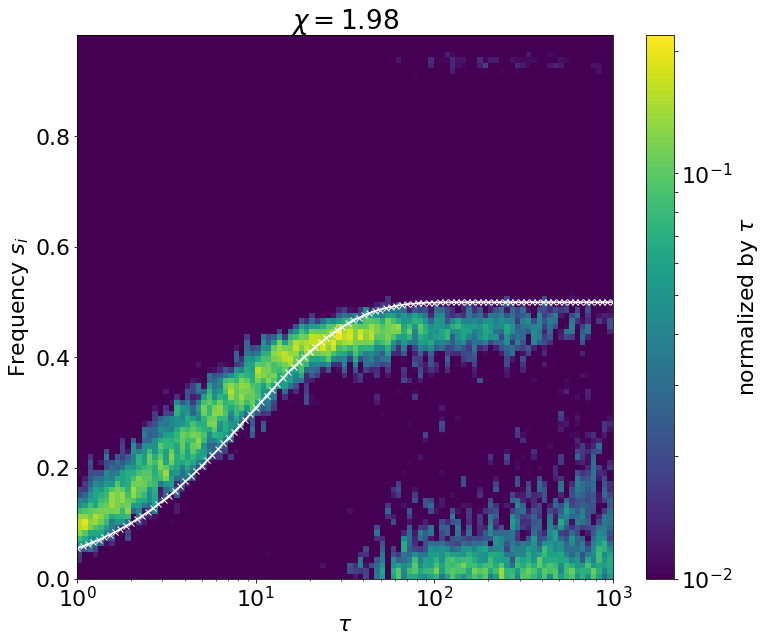

In [35]:
## X4_Ldistphi01_star_eps01_q_sim50
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X4_Ldistphi01_star_eps01_q_sim50/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(50)]) for j in range(100)], 
               axis= 1, keys = np.logspace(0,3,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,100),50*100), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})


fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data -0) / np.sum(data, axis=0)[ np.newaxis,:]
im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis',norm=colors.LogNorm(vmin=1./100,
                                                                                    vmax=norm_data.max()))
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

taus = np.logspace(0,3,100)
delta =0.06
#s = 0.5 - np.sqrt(taus*1)*0.03/(np.exp(taus*0.03) - 1.
a = np.exp(-taus*(1.98)*delta/2)
ax.semilogx(taus, (a-1)/(a-2)
            ,'wx-',label=r'$s^*$'); 

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')
ax.set_title(r'$\chi=1.98$')
fig.savefig('star_fit.pdf')

(100, 50)

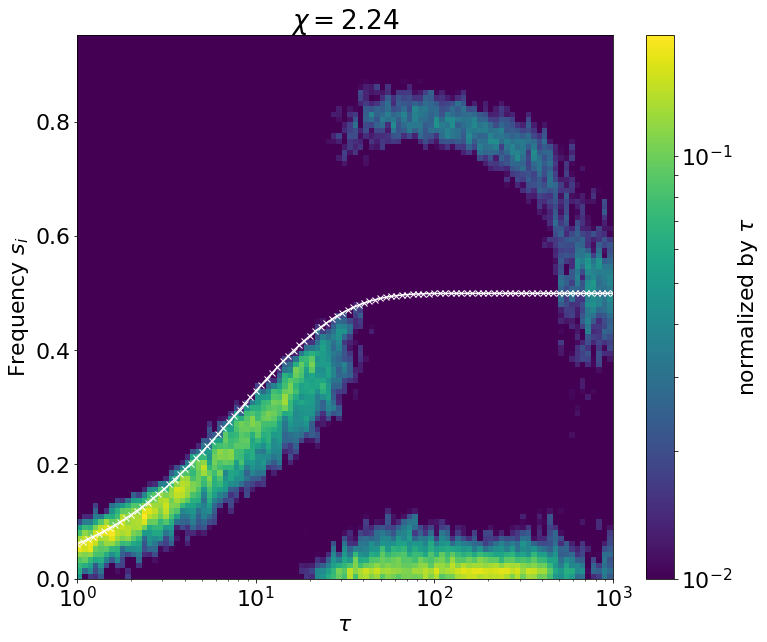

In [12]:
## X4_Ldistphi01_ER01_eps01_q_sim50
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X4_Ldistphi01_ER01_eps01_q_sim50/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(50)]) for j in range(100)], 
               axis= 1, keys = np.logspace(0,3,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,100),50*100), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})


fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data -0) / np.sum(data, axis=0)[ np.newaxis,:]
im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis',norm=colors.LogNorm(vmin=1./100,
                                                                                    vmax=norm_data.max()))
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

taus = np.logspace(0,3,100)
delta =0.06
#s = 0.5 - np.sqrt(taus*1)*0.03/(np.exp(taus*0.03) - 1.
a = np.exp(-taus*(2.24)*delta/2)
ax.semilogx(taus, (a-1)/(a-2)
            ,'wx-',label=r'$s^*$'); 

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')
ax.set_title(r'$\chi=2.24$')
fig.savefig('ER01_fit.pdf')

(100, 50)

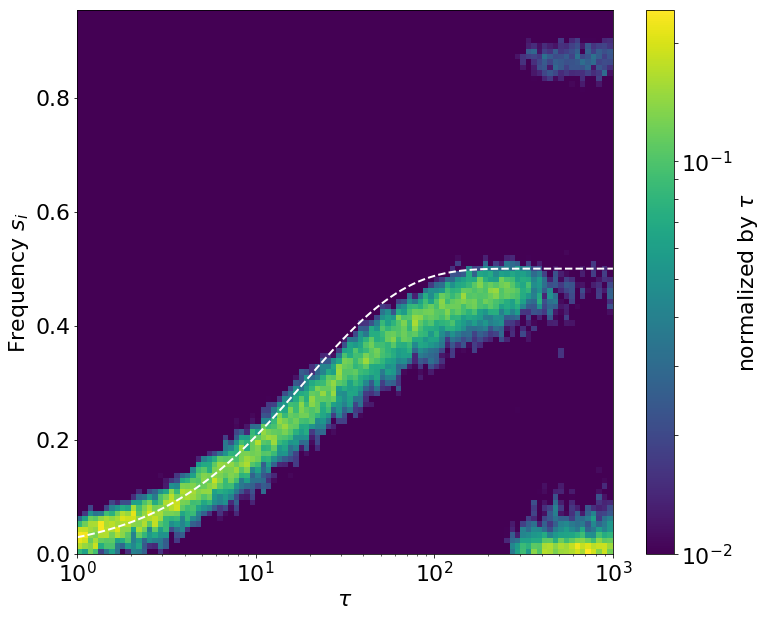

In [6]:
## X3_Ldistphi01_fully50_eps01_q_sim50/
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X3_Ldistphi01_fully50_eps01_q_sim50/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(50)]) for j in range(100)], 
               axis= 1, keys = np.logspace(0,3,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,100),50*50), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})


fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data -0) / np.sum(data, axis=0)[ np.newaxis,:]
im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis',norm=colors.LogNorm(vmin=1./100,
                                                                                    vmax=norm_data.max()))
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

taus = np.logspace(0,3,100)
delta =0.06
#s = 0.5 - np.sqrt(taus*1)*0.03/(np.exp(taus*0.03) - 1.
a = np.exp(-taus*(1)*delta/2)
ax.semilogx(taus, (a-1)/(a-2)
            ,'w--',label=r'$s^*$',lw=2); 

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')
#ax.set_title(r'$\chi=2.24$')
fig.savefig('X3_Ldistphi01_fully50_eps01_q_sim50.pdf')

(100, 50)

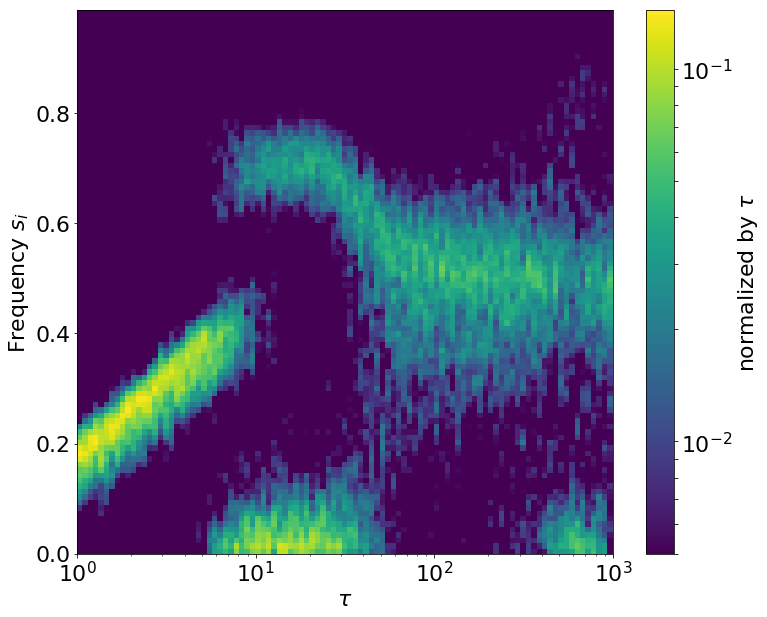

In [14]:
## X7_Ldistphi01_bara_m2_eps01_q_longer_sim50_d20/
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X7_Ldistphi01_bara_m2_eps01_q_longer_sim50_d20/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(50)]) for j in range(100)], 
               axis= 1, keys = np.logspace(0,3,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,100),50*100), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})


fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data -0) / np.sum(data, axis=0)[ np.newaxis,:]
im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis',norm=colors.LogNorm(vmin=0.5/100,
                                                                                    vmax=norm_data.max()))
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

taus = np.logspace(0,3,100)
delta =0.06
#s = 0.5 - np.sqrt(taus*1)*0.03/(np.exp(taus*0.03) - 1.
#a = np.exp(-taus*(25)*delta/2)
#ax.semilogx(taus, (a-1)/(a-2)
#            ,'wx-',label=r'$s^*$'); 

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
           
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')
#ax.set_title(r'$\chi=25$')
fig.savefig('X7_Ldistphi01_bara_m2_eps01_q_longer_sim50_d20.pdf')

(100, 50)

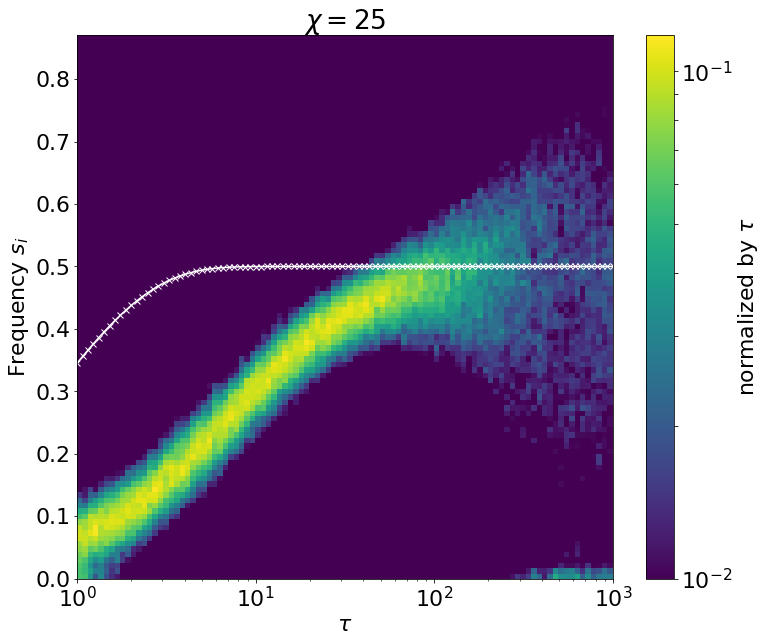

In [15]:
## X4_Ldistphi01_cycle_eps01_q_sim50_5000/
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X4_Ldistphi01_cycle_eps01_q_sim50_5000/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(50)]) for j in range(100)], 
               axis= 1, keys = np.logspace(0,3,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,100),50*100), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})


fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data -0) / np.sum(data, axis=0)[ np.newaxis,:]
im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis',norm=colors.LogNorm(vmin=1./100,
                                                                                    vmax=norm_data.max()))
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

taus = np.logspace(0,3,100)
delta =0.06
#s = 0.5 - np.sqrt(taus*1)*0.03/(np.exp(taus*0.03) - 1.
a = np.exp(-taus*(25)*delta/2)
ax.semilogx(taus, (a-1)/(a-2)
            ,'wx-',label=r'$s^*$'); 

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
           
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')
ax.set_title(r'$\chi=25$')
fig.savefig('cycle_fit.pdf')

(100, 50)

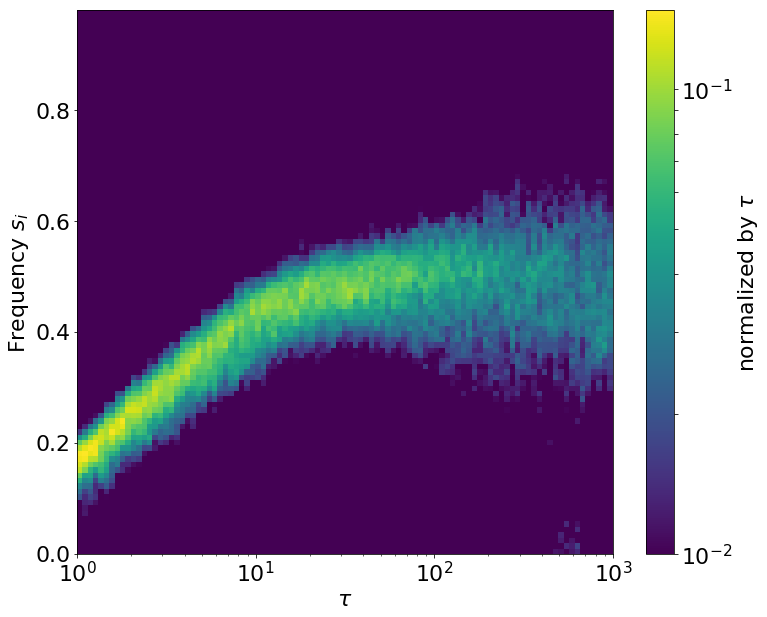

In [67]:
## X5_Ldistphi01_WS4_001_eps01_q_longer03_sim50_d20/ 
# X5_Ldistphi01_WS4_01_eps01_q_longer03_sim50_d20
# X5_Ldistphi01_WS6_01_eps01_q_longer03_sim50_d20/
# X5_Ldistphi01_WS4_03_eps01_q_longer03_sim50_d20/
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X5_Ldistphi01_WS4_01_eps01_q_longer03_sim50_d20/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(50)]) for j in range(100)], 
               axis= 1, keys = np.logspace(0,3,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,100),50*100), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})


fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data -0) / np.sum(data, axis=0)[ np.newaxis,:]
im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis',norm=colors.LogNorm(vmin=1./100,
                                                                                    vmax=norm_data.max()))
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

taus = np.logspace(0,3,100)
delta =0.06
#s = 0.5 - np.sqrt(taus*1)*0.03/(np.exp(taus*0.03) - 1.
a = np.exp(-taus*(2)*delta/2)
#ax.semilogx(taus, (a-1)/(a-2)
#            ,'wx-',label=r'$s^*$'); 

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
           
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')
#ax.set_title(r'$\chi=25$')
fig.savefig('X5_Ldistphi01_WS4_01_eps01_q_longer03_sim50_d20.pdf')

In [ ]:
## X5_Ldistphi01_WS4_001_eps01_q_longer03_sim50_d20/ 
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X5_Ldistphi01_WS4_01_eps01_q_longer03_sim50_d20/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(50)]) for j in range(100)], 
               axis= 1, keys = np.logspace(0,3,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,100),50*100), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})


fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data -0) / np.sum(data, axis=0)[ np.newaxis,:]
im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis',norm=colors.LogNorm(vmin=1./100,
                                                                                    vmax=norm_data.max()))
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

taus = np.logspace(0,3,100)
delta =0.06
#s = 0.5 - np.sqrt(taus*1)*0.03/(np.exp(taus*0.03) - 1.
a = np.exp(-taus*(2)*delta/2)
#ax.semilogx(taus, (a-1)/(a-2)
#            ,'wx-',label=r'$s^*$'); 

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
           
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')
#ax.set_title(r'$\chi=25$')
fig.savefig('X5_Ldistphi01_WS4_01_eps01_q_longer03_sim50_d20.pdf')

In [148]:
/

13.358078430630073

In [13]:
from scipy.stats.mstats import gmean
import networkx as nx
avg_sp=[]
ki_avg_sp=[]
effs=[]
N=500


for i in range(200):
    G = nx.barabasi_albert_graph(n=N,m=3) ##
    #G = nx.star_graph(N-1)
    
    #G = nx.watts_strogatz_graph(N, 4, 0.3)
    while len(max(nx.connected_component_subgraphs(G), key=len).nodes()) <N:
        G = nx.watts_strogatz_graph(N, 4, 0.3)
    #G = nx.watts_strogatz_graph(N, 4, 0.9)
    #G = nx.complete_graph(100)
    A = nx.to_numpy_matrix(G)
    degs = np.array(A.sum(1).T)
    d= nx.shortest_path_length(G)
    x=(np.array([list(d2.values()) for d2 in d.values()]) +np.eye(N)) -np.eye(N)
    
    dists= np.array([np.hstack((x[k,k+1:],x[k,:k]) ) for k in range(N)])
    
    
    avg_sp.append(dists.mean()) # avg shortest path length = 2.589
    ki_avg_sp.append( (dists.mean(1)*degs).sum()/degs.sum()) # k_i weighted avg spl = 2.41 
    
    #effs.append(np.argmax(degs.ravel())== np.argmin(x.mean(1)))
    
    #gamm = 100
    #effs.append(np.sum((x.mean(0)*np.power(degs[0,:],gamm))/np.power(degs[0,:],gamm).sum() ))
    
    effs.append(x[np.argmax(degs.ravel()),:].mean()) # 1.769
    #effs.append(x[np.argmin(x.mean(1))].mean())
    
    # of node with max degree
    #effs.append(( (x*degs).sum(1)/degs.sum() )[np.argmax(degs.ravel())])
    # of node with smallest avg dist
    #effs.append(( (x*degs).sum(1)/degs.sum() )[np.argmin(x.mean(1))])
#_= plt.hist(effs)
print np.mean(effs), np.mean(ki_avg_sp), np.mean(avg_sp)
# 1.56928 2.00027260638 2.10831464646 for N=100, m=6
# 1.962225 2.78360830241 3.02021636364 for N=100,m=2
# 2.02101 2.8398039293 3.03722795987 for N=300, m=3
# 0.99 1.49494949495 1.98 star, n=100
# 1.93041 2.19547246328 2.23807959596 for ER_01 forced one component
# 2.2549 3.28287622612 3.54047837235 for N=300, m=2
# 2.14697 3.03139535946 3.23461791583 N=500, m=3

2.14697 3.03139535946 3.23461791583


In [7]:
d=[]
c=[]
N=100
ps = np.logspace(-2,-0.001,40)
for p in ps:
    dists=[]
    cl=[]
    for i in range(100):
        #G = nx.watts_strogatz_graph(N, 4, p)
        G = nx.erdos_renyi_graph(N, p)

        #G = nx.barabasi_albert_graph(n=N,m=3) ##

        while len(max(nx.connected_component_subgraphs(G), key=len).nodes()) <N:
            G = nx.erdos_renyi_graph(N, p)
            #G = nx.watts_strogatz_graph(N, 4, p)
        dists.append(nx.average_shortest_path_length(G))
        cl.append(nx.average_clustering(G))
    d.append(np.mean(dists))
    c.append(np.mean(cl))


KeyboardInterrupt: 

(0.1, 1.5810660018413234)

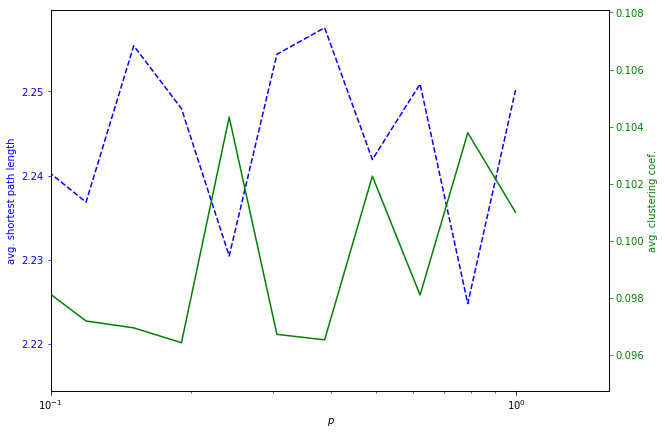

In [6]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(ps,d, 'b--',label='avg shortest path length') # Bara_100_2: 3  | Bara_100_3: 2.59 | 300_3 : 3.04
ax1 = ax.twinx()
ax1.plot(ps, c, 'g', label='avg. clustering coef.') #  Bara_100_2: 0.12 | Bara_100_3: 0.15
ax.set_xscale('log')
ax1.tick_params(axis='y', colors='g')
ax1.set_ylabel('avg. clustering coef.',color='g')
ax.set_ylabel('avg. shortest path length',color='b')
ax.tick_params(axis='y', colors='b')
ax.set_xlabel(r' $p$')
#ax.set_title(r'WS network with $\bar{k}=4$')
ax.set_xlim(xmin=0.1)
#fig.savefig('ER_cl_sp.pdf')

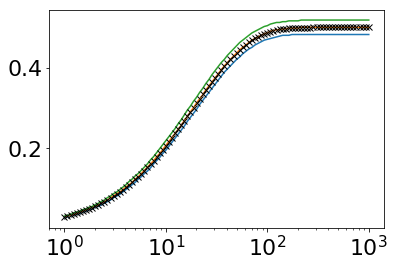

In [339]:
k=0.#
from scipy.stats import norm
sss=[]
taus = np.logspace(0,3,100)
delta=0.06
c_old= 0 
#eps=  -0.01
phis = [norm.ppf(np.power(0.95, 1./200),loc=1,scale= 0.01), 1.,
        norm.ppf( 1- np.power(0.95, 1./200),loc=1,scale= 0.01)]#np.random.normal(1,0.1,20)
for a,phi in enumerate(phis):
    ss=[]
    kk=[]
    for tau in taus:
        tau = tau #*10/6. # i.e. rate * <k>/sqrt(N)
        k=0.
        s=0.0005
        for i in range(1000):
            if 2*s*(np.exp(-tau*delta/2) -1*phi)+ - delta*np.sqrt(k/(1*phi))*np.exp(-tau*delta/2) \
                                    +1 - np.exp(-tau*delta/2) > 0:
                ds= 0.001  
            else: 
                ds =-0.001
            s+=ds
#            _ = np.random.random()
#             if _ < 0.5/100:
#                 s+=eps
#             elif _ >1- 0.5/100 :
#                 s-=eps
            k = phi*s*s/(delta*delta) 
            #print s,k
        ss.append(s)
        kk.append(k)
    _=plt.semilogx(taus,ss);
    sss.append(ss)
a = np.exp(-taus*delta/2)* (1.)
plt.plot(taus, (a-1.)/(a -2.),'kx')
#plt.semilogx(taus,ss_old,'k')
#np.save('500_eps01_s_curves.npy',np.array(sss))

(100, 200)

(0, 19.527577223199724)

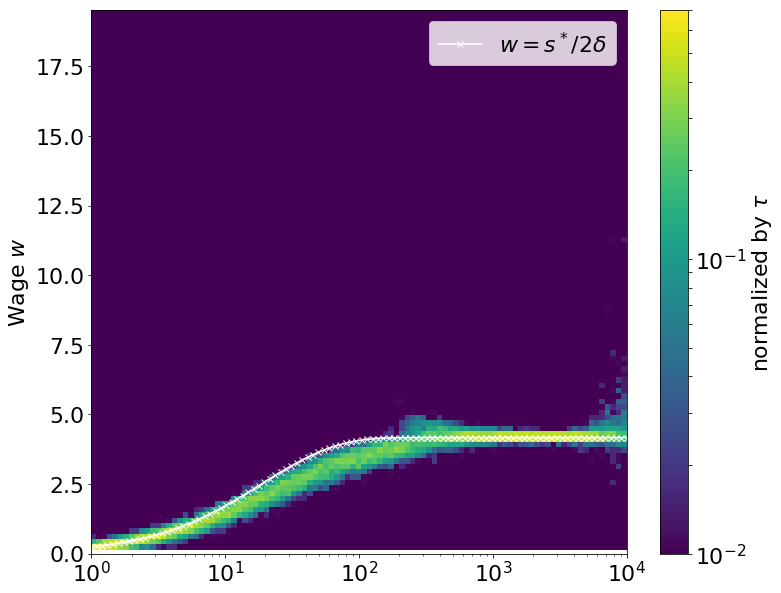

In [104]:
## X3_Ldistphi01_fully_eps01_q_longer
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X3_Ldistphi01_fully_eps01_q_longer/'
name= 'parameter_scan_macro'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape

df = pd.DataFrame(np.array([ np.array([xm[j][i][1] for i in range(200)]) for j in range(100)]),
                 index=np.logspace(0,4,100));
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,4,100),200), # tauspace, nsamples * nagents
                                            df.values.ravel(), 
                                            bins=[np.logspace(0,4,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data -0) / np.sum(data, axis=0)[ np.newaxis,:]
im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis',norm=colors.LogNorm(vmin=1./100,
                                                                                    vmax=0.7))
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')
#plt.plot(np.logspace(0,4,100) , .5/np.logspace(0,4,100) +0.06,'wx-',label=r'$0.5\tau^{-1} +\delta$')
taus = np.logspace(0,4,100)
a = np.exp(-taus*(1.0)*delta/2)
s = (a-1)/(a-2)
#plt.plot(taus , 0.03/s,'wx-',label=r'$r= \delta/2{s^*}$')
plt.plot(taus , s/0.12,'wx-',label=r'$w= {s^*}/2\delta$')

plt.legend()
fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Interest rate $r$')

ax.set_ylabel(r'Wage $w$')
#ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')
ax.set_ylim(0)
fig.savefig('X3_Ldistphi01_fully_eps01_q_longer_w_fit.pdf')

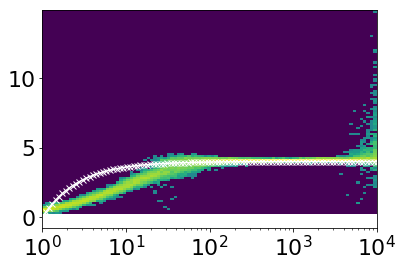

In [82]:
im2 = plt.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis',norm=colors.LogNorm(vmin=1./100,
                                                                                    vmax=norm_data.max()))
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')
#plt.plot(np.logspace(0,4,100) , .5/np.logspace(0,4,100) +0.06,'wx-',label=r'$0.5\tau^{-1} +\delta$')
plt.plot(np.logspace(0,4,100) , 8.*(.5 - .5/np.logspace(0,4,100)),'wx-',label=r'$0.5\tau^{-1} +\delta$')
plt.xscale('log')

In [ ]:
## X4_Ldistphi01_bara_eps01_q
from matplotlib import colors
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X4_Ldistphi01_bara_eps01_q/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(200)]) for j in range(100)], 
               axis= 1, keys = np.logspace(0,3,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,100),200*100), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data -0) / np.sum(data, axis=0)[ np.newaxis,:]
im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis',norm=colors.LogNorm(vmin=1./100,
                                                                                    vmax=norm_data.max()))
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')

ax.set_aspect('auto')
ax.set_xscale('log')
#fig.savefig('X4_Ldistphi01_bara_eps01_q.pdf')
#print norm_data[0,:]

In [10]:
## X3_Ldistphi01_fully50_eps01_q_longer
# X5_Ldistphi01_bara50_eps01_q_longer/
from matplotlib import colors
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X5_Ldistphi01_bara50_eps01_q_longer/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(50)]) for j in range(100)], # nagents, ntau
               axis= 1, keys = np.logspace(0,3,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,100),200*50), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data -0) / np.sum(data, axis=0)[ np.newaxis,:]
im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis',norm=colors.LogNorm(vmin=1./100,
                                                                                    vmax=norm_data.max()))
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')

ax.set_aspect('auto')
ax.set_xscale('log')
fig.savefig('X5_Ldistphi01_bara50_eps01_q_longer.pdf')
#print norm_data[0,:]

(100, 200)

IndexError: index 100 is out of bounds for axis 0 with size 100

(100, 50)

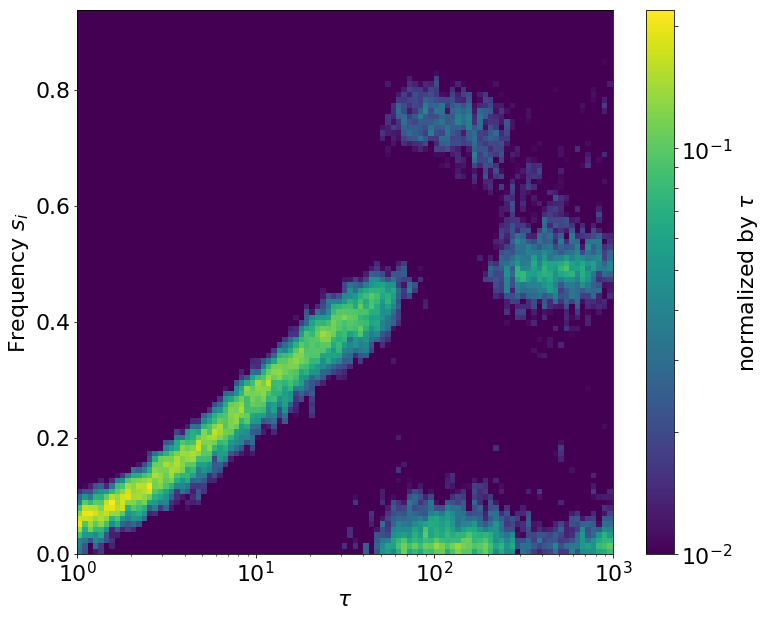

In [50]:
## X4_Ldistphi01_bara50_eps01_q_sim50
from matplotlib import colors
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X4_Ldistphi01_bara50_eps01_q_sim50/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(50)]) for j in range(100)], 
               axis= 1, keys = np.logspace(0,3,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,100),50*50), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data -0) / np.sum(data, axis=0)[ np.newaxis,:]
im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis',norm=colors.LogNorm(vmin=1./100,
                                                                                    vmax=norm_data.max()))
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')

ax.set_aspect('auto')
ax.set_xscale('log')
fig.savefig('X4_Ldistphi01_bara50_eps01_q_sim50.pdf')
#print norm_data[0,:]

In [2]:
def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    return (fair_area - area) / fair_area

(100, 200)

(0, 0.5)

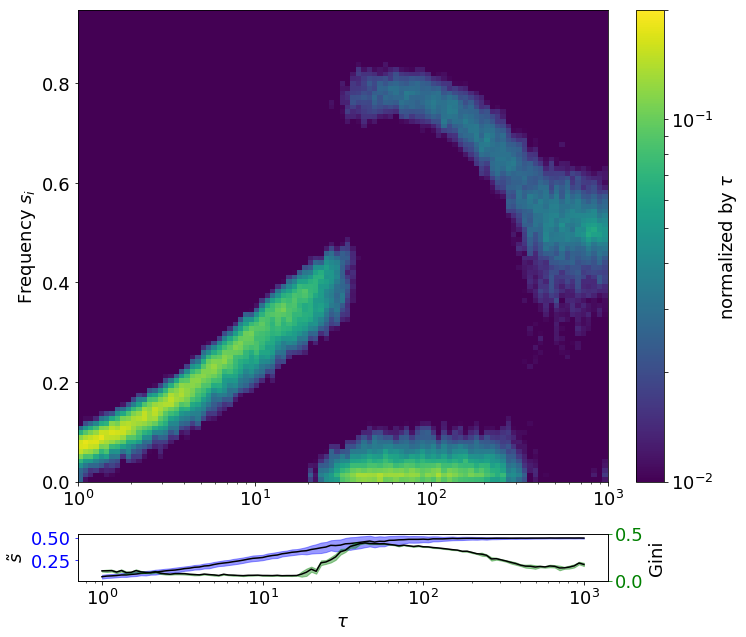

In [11]:
## X4_Ldistphi01_bara_eps01_q X4_Ldistphi01_bara_eps01_q
from matplotlib import colors
from matplotlib import gridspec

loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X4_Ldistphi01_bara_eps01_q/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(200)]) for j in range(100)], 
               axis= 1, keys = np.logspace(0,3,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,100),200*100), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 18})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots(2,1,sharex=True)
fig.set_size_inches((10.5,10.5))
gs = gridspec.GridSpec(2, 2, height_ratios=[10./10.5,1/10.5],width_ratios=[10./10.5,.5/10], wspace=0.1)
ax=plt.subplot(gs[0,0])

data = heatmap.T
#norm_data = (data - 0) / np.max(data, axis=0)[np.newaxis,:]
# im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis', norm=colors.LogNorm(vmin=heatmap.min()+1, 
#                                                                                      vmax=heatmap.max()))
#im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis')
norm_data = (data -0) / np.sum(data, axis=0)[ np.newaxis,:]
im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis',norm=colors.LogNorm(vmin=1./100,
                                                                                    vmax=0.2))
df_inc = pd.concat([ pd.concat([xm[j][i]['i'] for i in range(200)]) for j in range(100)], 
               axis= 1, keys = np.logspace(0,3,100))

ax3=plt.subplot(gs[0,1])
cb = plt.colorbar(im2,cax=ax3)
cb.set_label(r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
#ax.set_xlabel(r'$\tau$')
#ax.set_ylim((0,1))
#ax.set_aspect('equal')
ax.set_xscale('log')


loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X4_Ldistphi01_bara_eps01_q/'
name= 'parameter_scannat_sav'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()

# ks= (df_cap*df).values.reshape(100,200,100)
# y = ks.sum(1) / df_cap.values.reshape(100,200,100).sum(1)
#plt.imshow(heatmap.T)
ax2 = plt.subplot(gs[1,0])
ax3 = ax2.twinx()
#fig.set_size_inches((12,10))

ax2.plot(np.logspace(0,3,100),xm.mean(1) ,'k')
ax2.fill_between(np.logspace(0,3,100),xm.mean(1)-xm.std(1),xm.mean(1)+xm.std(1),
                 color='b',alpha=0.4)
#gg=[[gini(df_inc[tau][i:(i+1)*100]) for i in range(200)] for tau in np.logspace(0,3,100)]
ax3.plot(np.logspace(0,3,100), np.array(gg).mean(1),'k')
ax3.fill_between(np.logspace(0,3,100),np.array(gg).mean(1)-np.array(gg).std(1),np.array(gg).mean(1)+np.array(gg).std(1),
                 color='g',alpha=0.4)

ax3.set_ylabel(r'Gini')
ax2.tick_params(axis='y', colors='b')
ax3.tick_params(axis='y', colors='g')
ax2.set_ylabel(r'$\tilde{s}$')
ax2.set_xlabel(r'$\tau$')
ax2.set_xscale('log')
ax3.set_ylim((0,0.5))
#ax2.set_ylim(ymin=0.,ymax = 1.)
fig.savefig('X4_Ldistphi01_bara_eps01_q.pdf')

In [7]:
xm.mean(1)

array([ 0.06666007,  0.0733537 ,  0.07598336,  0.07973543,  0.08577842,
        0.08641737,  0.09236684,  0.09634434,  0.10328587,  0.10540232,
        0.11228037,  0.11737253,  0.12440779,  0.13130384,  0.13675313,
        0.1405291 ,  0.14789072,  0.15685559,  0.1617342 ,  0.17134619,
        0.17433122,  0.18563706,  0.18946017,  0.20221735,  0.21185333,
        0.21851958,  0.22477779,  0.23390678,  0.24146331,  0.250671  ,
        0.26144385,  0.27074301,  0.27473536,  0.28010675,  0.29303911,
        0.30211023,  0.307834  ,  0.32157307,  0.32853263,  0.33795128,
        0.34291238,  0.35136661,  0.35565602,  0.3692635 ,  0.37765672,
        0.38807892,  0.39654643,  0.41525637,  0.41278499,  0.41778275,
        0.43219602,  0.43541611,  0.44146667,  0.44878107,  0.45595284,
        0.46292989,  0.45186719,  0.46034159,  0.4587582 ,  0.47099966,
        0.47202939,  0.47655057,  0.47806077,  0.48182593,  0.48185318,
        0.48177689,  0.48406076,  0.48087065,  0.48749486,  0.48

(100, 200)

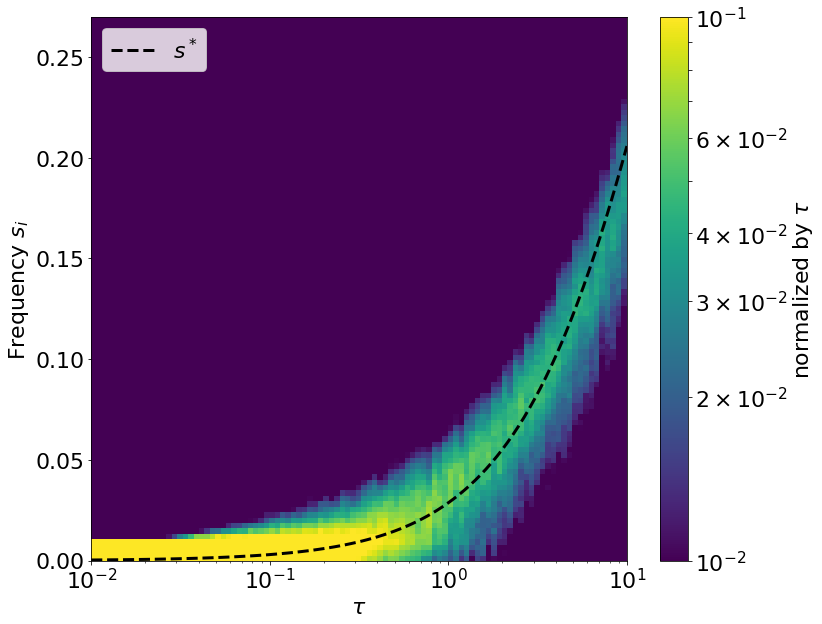

In [99]:
## X3_Ldistphi01_fully_eps01_q_shorter
from matplotlib import colors
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X3_Ldistphi01_fully_eps01_q_shorter/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(200)]) for j in range(100)], 
               axis= 1, keys = np.logspace(-2,1,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(-2,1,100),200*100), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(-2,1,100),100])

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data =heatmap.T
norm_data = (data -0) / np.sum(data, axis=0)[ np.newaxis,:]
im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis',norm=colors.LogNorm(vmin=0.01,
                                                                                    vmax=0.1))
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
#ax.set_ylim((0,1))
ax.set_aspect('auto')
taus = np.logspace(-2,1,100)
#tri = 1./taus + 0.03


a = np.exp(-taus*(1.0)*delta/2)
ax.semilogx(taus, (a-1)/(a-2)
            ,'k--',lw=3, label=r'$s^*$'); 
#ax.set_title(r'$K_0=0$')
ax.legend(loc='upper left')
#ax.set_ylim((0,.25))
ax.set_xscale('log')
fig.savefig('X3_Ldistphi01_fully_eps01_q_shorter_fit.pdf')
#print norm_data[0,:]

(100, 200)

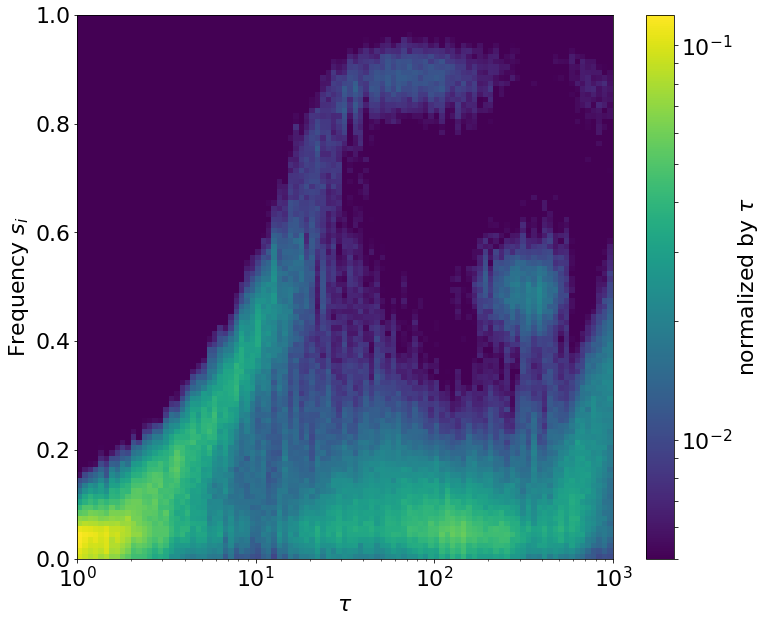

In [8]:
## X3_Ldistphi05_fully_eps05_q_longer
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X3_Ldistphi05_fully_eps05_q_longer/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(200)]) for j in range(100)], 
               axis= 1, keys = np.logspace(0,3,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,100),200*100), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data -0) / np.sum(data, axis=0)[ np.newaxis,:]
im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis',norm=colors.LogNorm(vmin=.5/100,
                                                                                    vmax=norm_data.max()))
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')
fig.savefig('X3_Ldistphi05_fully_eps05_q_longer.pdf')
#print norm_data[0,:]

(100, 200)

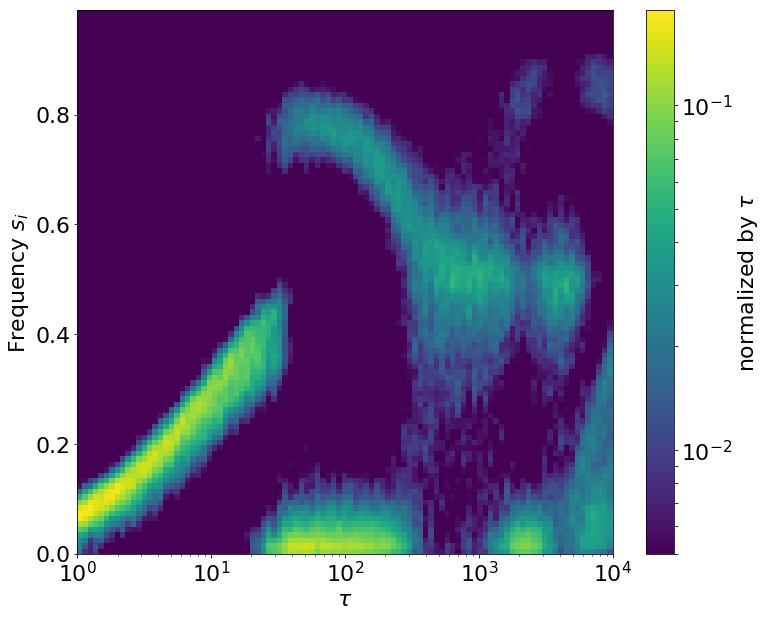

In [99]:
## X4_Ldistphi01_bara_eps01_q_longer
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X4_Ldistphi01_bara_eps01_q_longer/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(200)]) for j in range(100)], 
               axis= 1, keys = np.logspace(0,4,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,4,100),200*100), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,4,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data -0) / np.sum(data, axis=0)[ np.newaxis,:]
im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis',norm=colors.LogNorm(vmin=.5/100,
                                                                                    vmax=norm_data.max()))
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')
#fig.savefig('X4_Ldistphi01_bara_eps01_q_longer.pdf')
#print norm_data[0,:]

(100, 200)

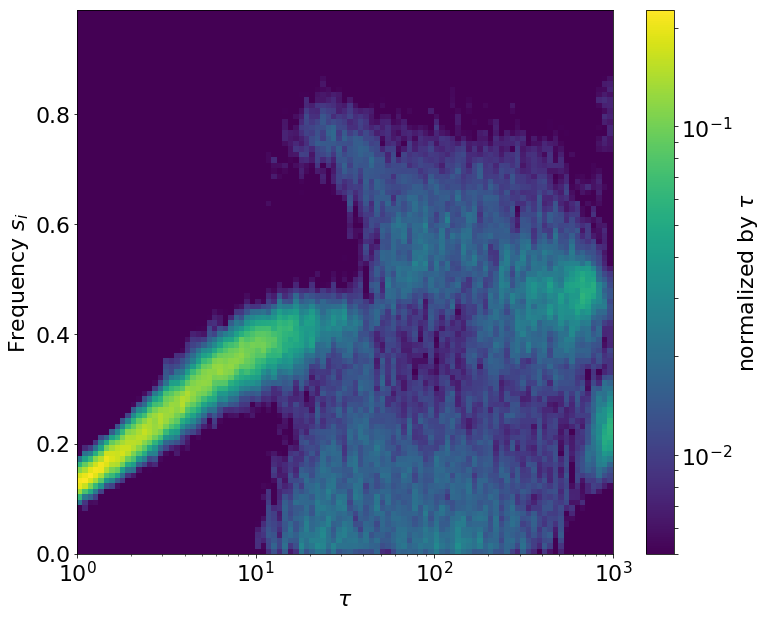

In [10]:
## X6_Ldistphi10_bara_eps01_q_longer
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X6_Ldistphi10_bara_eps01_q_longer/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(200)]) for j in range(100)], 
               axis= 1, keys = np.logspace(0,3,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,100),200*100), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data -0) / np.sum(data, axis=0)[ np.newaxis,:]
im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis',norm=colors.LogNorm(vmin=.5/100,
                                                                                    vmax=norm_data.max()))
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')
fig.savefig('X6_Ldistphi10_bara_eps01_q_longer.pdf')
#print norm_data[0,:]

(100, 200)

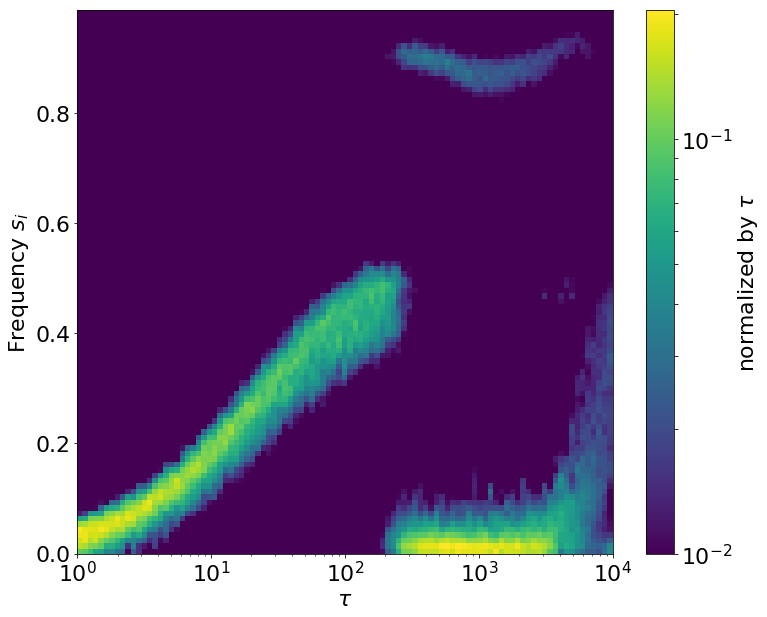

In [7]:
## X3_Ldistphi01_fully_eps01_q_longer
from matplotlib import colors
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X3_Ldistphi01_fully_eps01_q_longer/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(200)]) for j in range(100)], 
               axis= 1, keys = np.logspace(0,4,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,4,100),200*100), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,4,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data -0) / np.sum(data, axis=0)[ np.newaxis,:]
im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis',norm=colors.LogNorm(vmin=1./100,
                                                                                    vmax=norm_data.max()))
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')

ax.set_aspect('auto')
ax.set_xscale('log')
fig.savefig('X3_Ldistphi01_fully_eps01_q_longer.pdf')
#print norm_data[0,:]

In [44]:
## not working: X5_Ldistphi10_fully_eps01_q_longer
from matplotlib import colors
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X5_Ldistphi10_fully_eps01_q_longer/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(200)]) for j in range(100)], 
               axis= 1, keys = np.logspace(0,4,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,4,100),200*100), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,4,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data -0) / np.sum(data, axis=0)[ np.newaxis,:]
im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis',norm=colors.LogNorm(vmin=1./100,
                                                                                    vmax=norm_data.max()))
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')

ax.set_aspect('auto')
ax.set_xscale('log')
fig.savefig('X5_Ldistphi10_fully_eps01_q_longer .pdf')
#print norm_data[0,:]

IOError: [Errno 2] No such file or directory: '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X5_Ldistphi01_fully_eps10_q_longer/parameter_scan_all_si'

(100, 50)

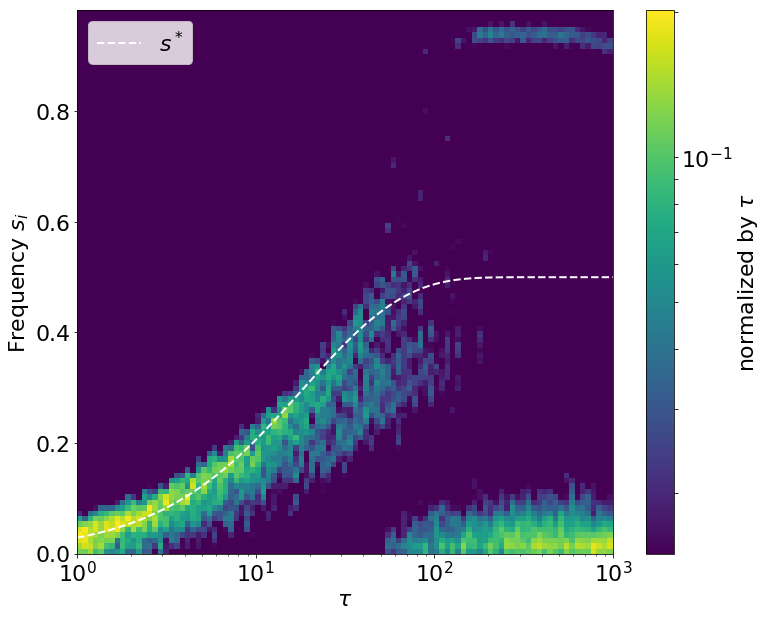

In [9]:
##  not working : X6_Ldistphi01_fully300_eps01_q_longer03_sim50//
from matplotlib import colors
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X6_Ldistphi01_fully300_eps01_q_longer03_sim50/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(50)]) for j in range(100)], #nsamples, ntauspace
               axis= 1, keys = np.logspace(0,3,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,100),50*300), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data -0) / np.sum(data, axis=0)[ np.newaxis,:]
im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis',norm=colors.LogNorm(vmin=1.5/100,
                                                                                    vmax=norm_data.max()))
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')

ax.set_aspect('auto')
ax.set_xscale('log')

#print norm_data[0,:]
taus = np.logspace(0,3,100)
delta =0.06
#s = 0.5 - np.sqrt(taus*1)*0.03/(np.exp(taus*0.03) - 1.
a = np.exp(-taus*(1)*delta/2)
ax.semilogx(taus, (a-1)/(a-2),'w--',lw=2,label=r'$s^*$')
ax.legend(loc='upper left')
fig.savefig('X6_Ldistphi01_fully300_eps01_q_longer03_sim50.pdf')

(100, 50)

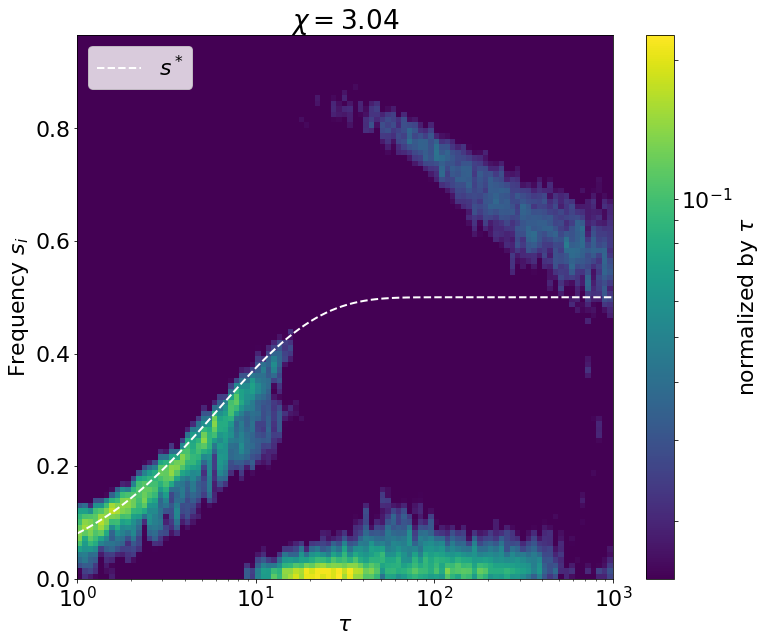

In [8]:
## X6_Ldistphi01_300bara_eps01_q_longer03_sim50
from matplotlib import colors
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X6_Ldistphi01_300bara_eps01_q_longer03_sim50/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(50)]) for j in range(100)], 
               axis= 1, keys = np.logspace(0,3,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,100),50*300), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data -0) / np.sum(data, axis=0)[ np.newaxis,:]
im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis',norm=colors.LogNorm(vmin=1.5/100,
                                                                                    vmax=norm_data.max()))
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')

ax.set_aspect('auto')
ax.set_xscale('log')

#print norm_data[0,:]
taus = np.logspace(0,3,100)
delta =0.06
#s = 0.5 - np.sqrt(taus*1)*0.03/(np.exp(taus*0.03) - 1.
a = np.exp(-taus*(3.04)*delta/2)
ax.semilogx(taus, (a-1)/(a-2),'w--',lw=2, label=r'$s^*$')
ax.legend(loc='upper left')
ax.set_title(r'$\chi = 3.04$')
fig.savefig('X6_Ldistphi01_300bara_eps01_q_longer03_sim50.pdf')

(100, 50)

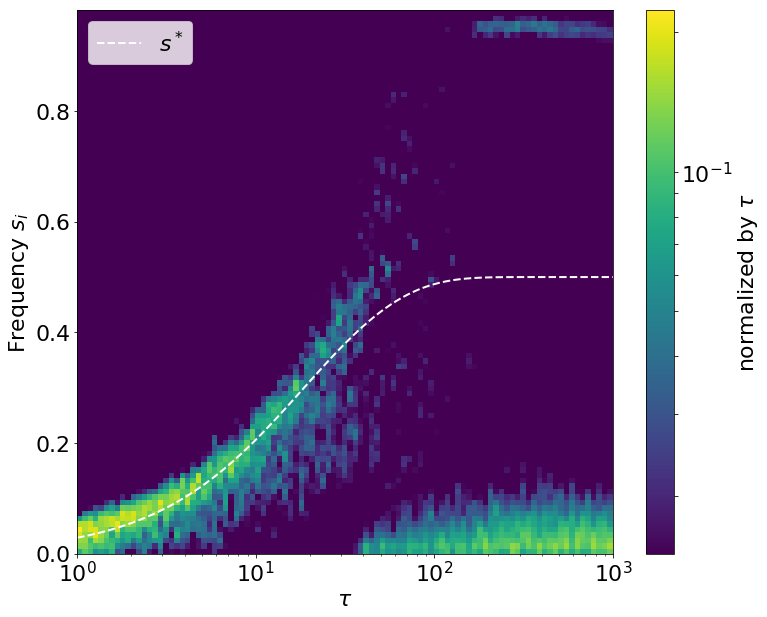

In [12]:
## X3_Ldistphi01_fully500_eps01_q_sim50/
from matplotlib import colors
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X3_Ldistphi01_fully500_eps01_q_sim50/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(50)]) for j in range(100)], 
               axis= 1, keys = np.logspace(0,3,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,100),50*500), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data -0) / np.sum(data, axis=0)[ np.newaxis,:]
im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis',norm=colors.LogNorm(vmin=1.5/100,
                                                                                    vmax=norm_data.max()))
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')

ax.set_aspect('auto')
ax.set_xscale('log')

#print norm_data[0,:]
taus = np.logspace(0,3,100)
delta =0.06
#s = 0.5 - np.sqrt(taus*1)*0.03/(np.exp(taus*0.03) - 1.
a = np.exp(-taus*(1.)*delta/2)
ax.semilogx(taus, (a-1)/(a-2),'w--',lw=2, label=r'$s^*$')
ax.legend(loc='upper left')
#ax.set_title(r'$\chi = 3.04$')
fig.savefig('X3_Ldistphi01_fully500_eps01_q_sim50.pdf')

(100, 50)

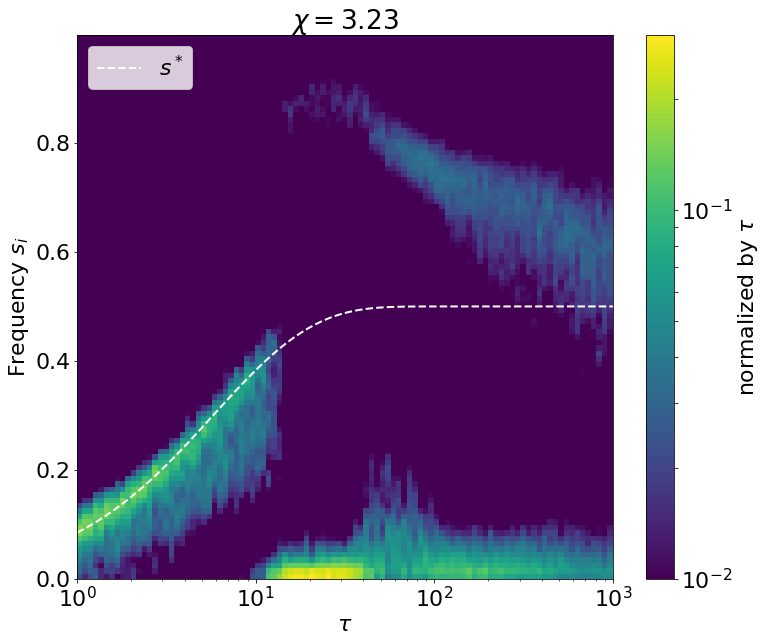

In [15]:
## X4_Ldistphi01_bara500_eps01_q_sim50/
from matplotlib import colors
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X4_Ldistphi01_bara500_eps01_q_sim50/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(50)]) for j in range(100)], 
               axis= 1, keys = np.logspace(0,3,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,100),50*500), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data -0) / np.sum(data, axis=0)[ np.newaxis,:]
im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis',norm=colors.LogNorm(vmin=1./100,
                                                                                    vmax=norm_data.max()))
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')

ax.set_aspect('auto')
ax.set_xscale('log')

#print norm_data[0,:]
taus = np.logspace(0,3,100)
delta =0.06
#s = 0.5 - np.sqrt(taus*1)*0.03/(np.exp(taus*0.03) - 1.
a = np.exp(-taus*(3.23)*delta/2)
ax.semilogx(taus, (a-1)/(a-2),'w--',lw=2, label=r'$s^*$')
ax.legend(loc='upper left')
ax.set_title(r'$\chi = 3.23$')
fig.savefig('X4_Ldistphi01_bara500_eps01_q_sim50.pdf')

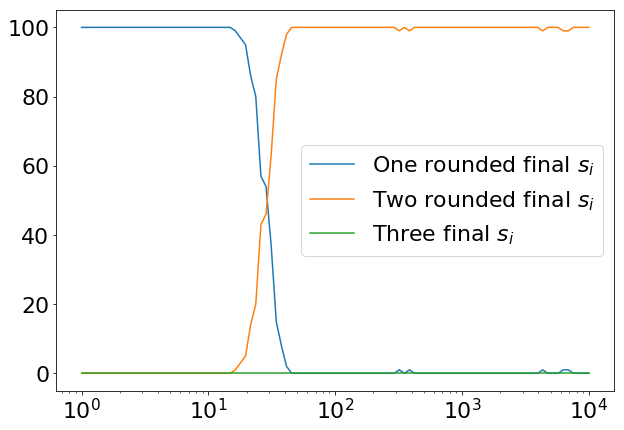

In [102]:
uniq1=[]
uniq2=[]
uniqmore=[]
tauspace = np.logspace(0,4,100)
for tau in tauspace: 
    uniq_s = []
    for i in range(100): # number of simulations
        uniq_s.append(len(np.unique(np.round(df[tau].values[100*i: 100*(i+1)], 0)))) # number of agents=100
    uniq1.append(sum(np.array(uniq_s)==1))
    uniq2.append(sum(np.array(uniq_s)==2))
    uniqmore.append(sum(np.array(uniq_s)==3))
    #print np.array(uniq_s) [ np.array(uniq_s)>2]
    
fig, ax = plt.subplots(figsize=(10,7))
ax.semilogx(tauspace,uniq1,label=r'One rounded final $s_i$')
ax.semilogx(tauspace,uniq2,label=r'Two rounded final $s_i$')
ax.semilogx(tauspace,uniqmore,label=r'Three final $s_i$')
ax.legend()
#fig.savefig('X4_Ldistphi01_bara_eps01_q_si.pdf')


In [ ]:
#test to plot k as color s vs tau
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(200)]) for j in range(200)], 
               axis= 1, keys = np.logspace(0,3,200))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,200),200*100), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,200),100])
heatmap2, xedges2, yedges2 = np.histogram2d(xedges, kn, 
                                            bins=[xedges,100])



extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
#norm_data = (data - 0) / np.max(data, axis=1)[:, np.newaxis]
im2 = ax.pcolormesh(xedges,yedges , (data),  cmap='viridis')
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'Capital')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')